In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('airbnb_nyc_train.csv')
test = pd.read_csv('airbnb_nyc_test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37696 entries, 0 to 37695
Data columns (total 6 columns):
neighbourhood_group               37696 non-null object
neighbourhood                     37696 non-null object
room_type                         37696 non-null object
minimum_nights                    37696 non-null int64
calculated_host_listings_count    37696 non-null int64
price                             37696 non-null int64
dtypes: int64(3), object(3)
memory usage: 1.7+ MB


In [4]:
def map_neighbourhood(x):
    if x.price <= 50:
        return 1
    elif x.price <= 100:
        return 2
    elif x.price <= 150:
        return 3
    elif x.price <= 200:
        return 4
    elif x.price <= 250:
        return 5
    elif x.price <= 300:
        return 6
    else:
        return 7
train['maped_loc'] = train.apply(map_neighbourhood, axis=1)

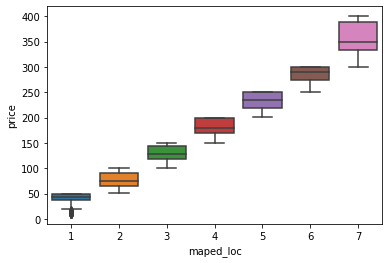

In [5]:
g = sns.boxplot(x='maped_loc', y='price', data=train)

In [6]:
test['maped_loc'] = test.apply(map_neighbourhood, axis=1)

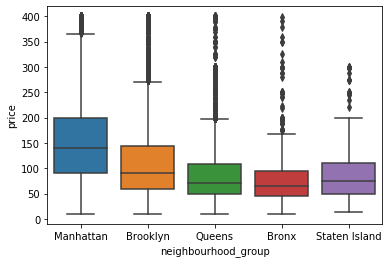

In [7]:
g = sns.boxplot(x='neighbourhood_group', y='price', data=train)

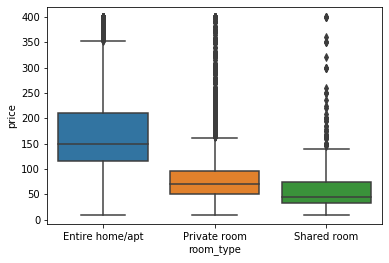

In [8]:
g = sns.boxplot(x='room_type', y='price', data=train)

In [9]:
train['maped_room_type'] = train['room_type'].map({'Entire home/apt':1, 'Private room':2, 'Shared room':2})
test['maped_room_type'] = test['room_type'].map({'Entire home/apt':1, 'Private room':2, 'Shared room':2})


In [10]:
train['minimum_nights'].describe()

count    37696.000000
mean         7.025891
std         20.347440
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

[Text(0, 0, '1000'),
 Text(0, 0, '366'),
 Text(0, 0, '105'),
 Text(0, 0, '480'),
 Text(0, 0, '265'),
 Text(0, 0, '1250'),
 Text(0, 0, '29'),
 Text(0, 0, '270'),
 Text(0, 0, '65'),
 Text(0, 0, '153'),
 Text(0, 0, '184'),
 Text(0, 0, '360'),
 Text(0, 0, '62'),
 Text(0, 0, '364'),
 Text(0, 0, '300'),
 Text(0, 0, '31'),
 Text(0, 0, '365'),
 Text(0, 0, '88'),
 Text(0, 0, '30'),
 Text(0, 0, '80'),
 Text(0, 0, '210'),
 Text(0, 0, '68'),
 Text(0, 0, '43'),
 Text(0, 0, '120'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '181'),
 Text(0, 0, '5'),
 Text(0, 0, '370'),
 Text(0, 0, '55'),
 Text(0, 0, '354'),
 Text(0, 0, '200'),
 Text(0, 0, '90'),
 Text(0, 0, '225'),
 Text(0, 0, '45'),
 Text(0, 0, '60'),
 Text(0, 0, '500'),
 Text(0, 0, '2'),
 Text(0, 0, '160'),
 Text(0, 0, '56'),
 Text(0, 0, '59'),
 Text(0, 0, '115'),
 Text(0, 0, '32'),
 Text(0, 0, '11'),
 Text(0, 0, '28'),
 Text(0, 0, '9'),
 Text(0, 0, '19'),
 Text(0, 0, '8'),
 Text(0, 0, '70'),
 Text(0, 0, '250'),
 Text(0, 0, 

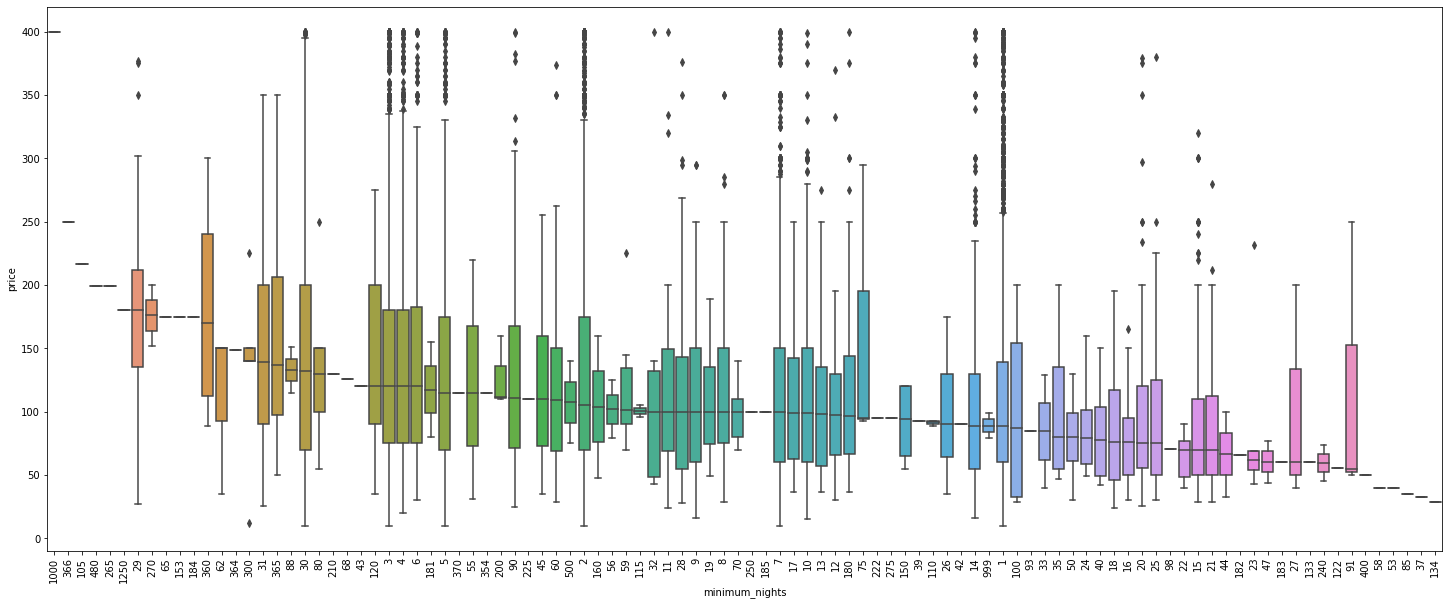

In [52]:
plt.figure(figsize=(25, 10))
my_order = train.groupby(by=["minimum_nights"])["price"].median().sort_values(ascending = False).index
g = sns.boxplot(x=train['minimum_nights'], y=train['price'], order=my_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

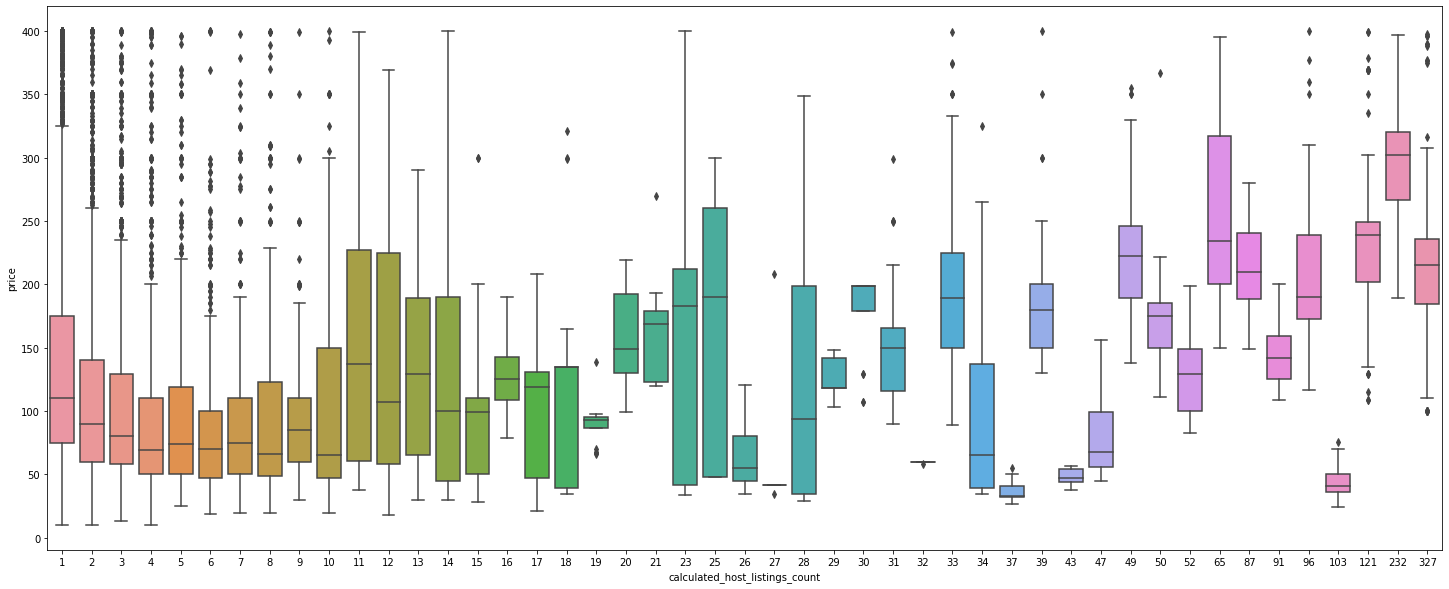

In [54]:
plt.figure(figsize=(25, 10))
g = sns.boxplot(x='calculated_host_listings_count', y='price', data=train)


In [11]:
X_train = train.iloc[:,-2:]
y_train = train['price']
X_test = test.iloc[:,-2:]
y_test = test['price']

In [17]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(X_train, y_train)

print(sqrt(mean_squared_error(y_train, linear_reg.predict(X_train))))
print(sqrt(mean_squared_error(y_test, linear_reg.predict(X_test))))

16.29379015083966
16.318348861914217


In [23]:
pd.DataFrame([linear_reg.predict(X_train), y_train]).T

,0,1
0,133.999819,115.0
1,80.151199,99.0
2,184.727041,200.0
3,235.454263,222.0
4,286.181484,259.0
5,235.454263,250.0
6,133.999819,105.0
7,80.151199,55.0
8,80.151199,55.0
9,83.272597,88.0


In [68]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=0.5).fit(X_train, y_train)
ridge_reg.score(X_train, y_train), ridge_reg.score(X_test, y_test)

(0.9565135561653361, 0.9565031406583228)

In [77]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.001).fit(X_train, y_train)
lasso_reg.score(X_train, y_train), lasso_reg.score(X_test, y_test)

(0.956513554895116, 0.9565032570458766)

In [78]:
from sklearn import linear_model
bayesian_reg = linear_model.BayesianRidge().fit(X_train, y_train)
bayesian_reg.score(X_train, y_train), bayesian_reg.score(X_test, y_test)

(0.9565135562003105, 0.9565031570625491)

In [94]:
from sklearn import linear_model
sdg_clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3).fit(X_train, y_train)
sdg_clf.score(X_train, y_train), sdg_clf.score(X_test, y_test)

(0.956430881059249, 0.9564756146885796)

In [97]:
from sklearn import svm
svm_clf = svm.SVR().fit(X_train, y_train)
svm_clf.score(X_train, y_train), svm_clf.score(X_test, y_test)

C:\Application\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(0.963701315762801, 0.963913794601016)

In [106]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=600).fit(X_train, y_train)
neigh.score(X_train, y_train), neigh.score(X_test, y_test)

(0.9646573339564503, 0.9650675117368601)

In [107]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor().fit(X_train, y_train)
mlp.score(X_train, y_train), mlp.score(X_test, y_test)

C:\Application\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.9644607557130074, 0.9647666402692269)

In [108]:
from sklearn.ensemble import VotingRegressor
svm_clf = svm.SVR()
neigh = KNeighborsRegressor(n_neighbors=600)
mlp = MLPRegressor()
ereg = VotingRegressor(estimators=[('svm', svm_clf), ('neigh', neigh), ('mlp', mlp)]).fit(X_train, y_train)
ereg.score(X_train, y_train), ereg.score(X_test, y_test)


C:\Application\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Application\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.9644332151853573, 0.9647206531924604)